In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


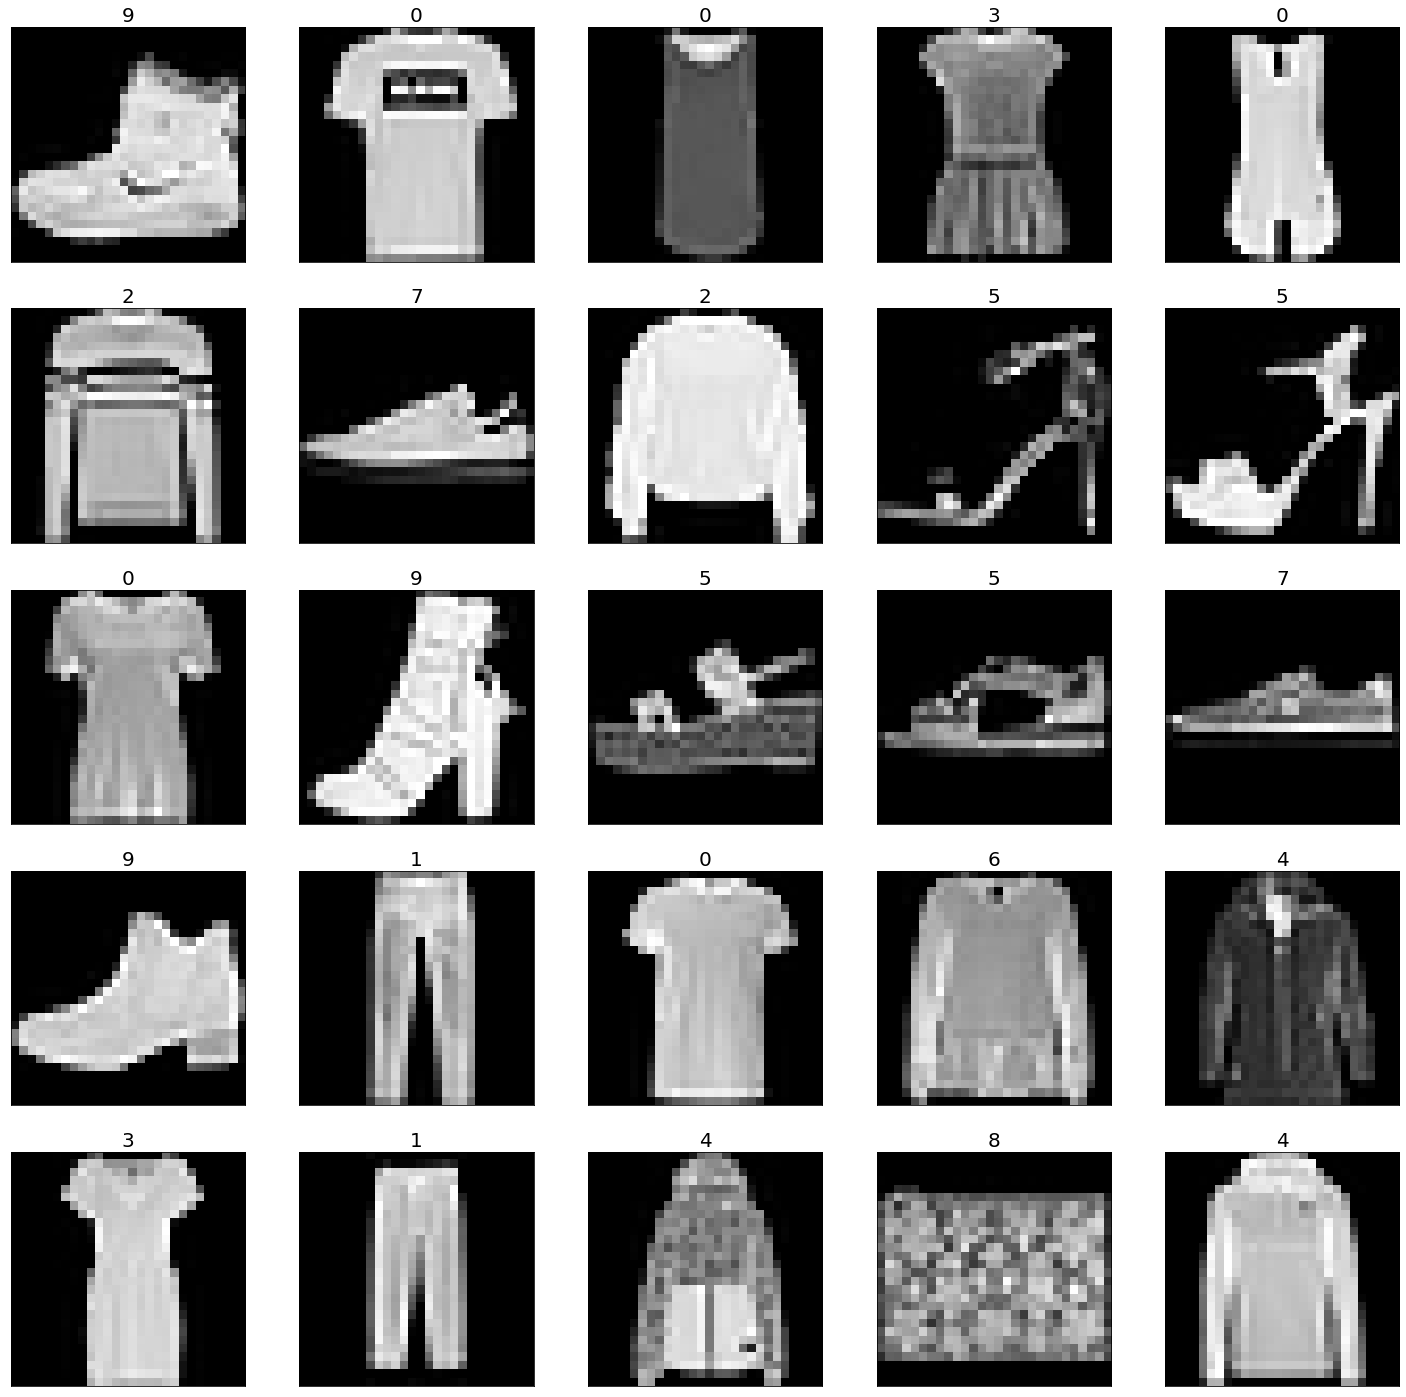

In [7]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train1[i],'gray')
    plt.title(y_train1[i],fontsize=20)
plt.show()

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


#### Appraoch - 1, 
loss - sparse_categorical_crossentropy

In [11]:
y_train1 = y_train.reshape(60000)
y_test1 = y_test.reshape(10000)
print(y_train1.shape)
print(y_test1.shape)

(60000,)
(10000,)


In [12]:
print(set(y_train1))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [13]:
labels = {'T-shirt/top' : 0,'Trouser' : 1, 'Pullover':2,'Dress' : 3,
    'Coat' : 4, 'Sandal' : 5,'Shirt' : 6,'Sneaker' : 7,'Bag' : 8,'Ankle boot' : 9}
labels = {v:k for k,v in labels.items()}
print(labels)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [14]:
ypred = np.random.randint(0,10)
labels[ypred]

'Sneaker'

In [16]:
x_train1  = x_train[:10000,:,:]
y_train1 = y_train1[:10000]
x_test1 = x_test[:3000,:,:]
y_test1 = y_test1[:3000]
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(10000, 28, 28)
(3000, 28, 28)
(10000,)
(3000,)


In [20]:
# reshaping 

In [35]:
x_train1  = x_train1.reshape(10000,28,28,1)
x_test1  = x_test1.reshape(3000,28,28,1)
print(x_train1.shape)
# print(x_test1.shape)
print(y_train1.shape)
# print(y_test1.shape)

(10000, 28, 28, 1)
(10000,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [27]:
m1 = Sequential()
m1.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))  

m1.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))  

m1.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))  

m1.add(Flatten())
m1.add(Dense(64,activation='relu'))
m1.add(Dense(10,activation='softmax'))


m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

m1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [37]:
h1 = m1.fit(x_train1,y_train1,epochs=25,validation_data=(x_test1,y_test1))

Epoch 1/25
313/313 [==============================] - 4s 14ms/step - loss: 0.4129 - acc: 0.8466 - val_loss: 0.5206 - val_acc: 0.8230
Epoch 2/25
313/313 [==============================] - 4s 14ms/step - loss: 0.3750 - acc: 0.8572 - val_loss: 0.5094 - val_acc: 0.8300
Epoch 3/25
313/313 [==============================] - 4s 13ms/step - loss: 0.3338 - acc: 0.8783 - val_loss: 0.5153 - val_acc: 0.8313
Epoch 4/25
313/313 [==============================] - 4s 13ms/step - loss: 0.3200 - acc: 0.8833 - val_loss: 0.5851 - val_acc: 0.8053
Epoch 5/25
313/313 [==============================] - 4s 13ms/step - loss: 0.2958 - acc: 0.8897 - val_loss: 0.5318 - val_acc: 0.8293
Epoch 6/25
313/313 [==============================] - 4s 13ms/step - loss: 0.2779 - acc: 0.8971 - val_loss: 0.5380 - val_acc: 0.8310
Epoch 7/25
313/313 [==============================] - 4s 13ms/step - loss: 0.2539 - acc: 0.9053 - val_loss: 0.5383 - val_acc: 0.8357
Epoch 8/25
313/313 [==============================] - 4s 14ms/step - 

In [38]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
20,0.127334,0.9527,0.812440,0.840000,20
21,0.107437,0.9644,0.968146,0.812333,21
22,0.111285,0.9587,0.842892,0.839000,22
23,0.106426,0.9606,0.884995,0.834000,23
24,0.091145,0.9664,0.872463,0.840000,24


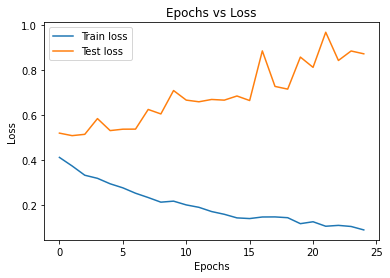

In [39]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

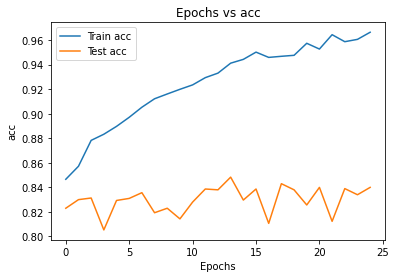

In [41]:
plt.plot(r1['Epochs'],r1['acc'],label='Train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test acc')
plt.title('Epochs vs acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [42]:
ypred = m1.predict(x_test)
ypred[:5]

313/313 [==============================] - 3s 8ms/step


array([[2.2564766e-11, 2.6051093e-13, 6.4312888e-16, 2.5235422e-10,
        1.0191559e-14, 8.4851626e-11, 7.2221612e-10, 6.6599128e-08,
        1.4348477e-12, 9.9999988e-01],
       [1.1013095e-11, 3.0309658e-17, 9.9999940e-01, 2.9931375e-08,
        6.4538023e-07, 1.8369164e-16, 1.7081362e-09, 3.5873915e-11,
        2.3786443e-15, 1.6977263e-20],
       [1.6766221e-22, 1.0000000e+00, 4.4624959e-23, 2.2527618e-22,
        5.5664451e-34, 1.1345513e-35, 1.2497078e-19, 8.9606324e-37,
        1.7697129e-20, 4.4110581e-32],
       [1.0551393e-15, 1.0000000e+00, 6.2249345e-24, 7.9798411e-17,
        4.5052845e-26, 2.4323157e-22, 6.4667488e-13, 1.5322154e-25,
        8.5686759e-15, 1.0082746e-21],
       [7.7446159e-05, 2.2663917e-06, 4.6841949e-05, 1.0733222e-05,
        4.6904898e-01, 1.9183487e-08, 5.3081369e-01, 3.8871981e-09,
        2.6117881e-09, 3.9589474e-09]], dtype=float32)

In [43]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1[:5])

[9, 2, 1, 1, 6]


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[708   5  26  39  16   2 199   0   5   0]
 [  3 960   1  19   6   0   8   0   3   0]
 [ 16   2 685  15 145   0 136   0   1   0]
 [ 20  12  18 854  38   2  52   1   2   1]
 [  2   0  53  38 789   0 114   0   4   0]
 [  0   3   0   4   1 907   0  65   1  19]
 [ 90   6  59  29 154   0 649   0  11   2]
 [  0   0   0   0   0  17   0 949   0  34]
 [  5   4   6   3   9   4  29   3 935   2]
 [  0   0   0   1   0   8   0  49   1 941]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1000
           1       0.97      0.96      0.96      1000
           2       0.81      0.69      0.74      1000
           3       0.85      0.85      0.85      1000
           4       0.68      0.79      0.73      1000
           5       0.96      0.91      0.94      1000
           6       0.55      0.65      0.59      1000
           7       0.89      0.95      0.92      1000
           8       0.97      0.94      0.95      1000
           9       0.94     

In [59]:
def test_img_pred(img_idx):
    test_img = x_test[img_idx].reshape(1,28,28,1)
    pred = m1.predict(test_img)  # 2D numpy array
    res = np.argmax(pred[0])
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx])
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Test Image {img_idx}')
    plt.xlabel(f'Actual Val: {labels[y_test1[img_idx]]}\nPrediced val {labels[res]}')
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.xticks(np.arange(10))
    plt.title('Prediction Probability')
    plt.show()

1/1 [==============================] - 0s 61ms/step


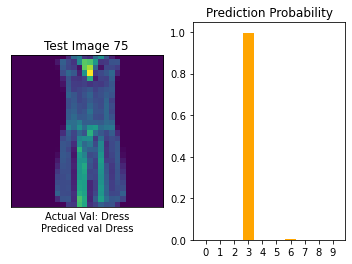

In [60]:
test_img_pred(75)

1/1 [==============================] - 0s 56ms/step


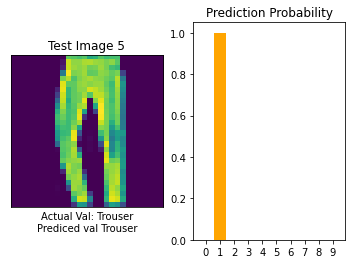

In [61]:
test_img_pred(5)

1/1 [==============================] - 0s 46ms/step


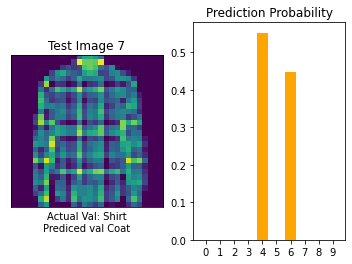

In [62]:
test_img_pred(7)

1/1 [==============================] - 0s 40ms/step


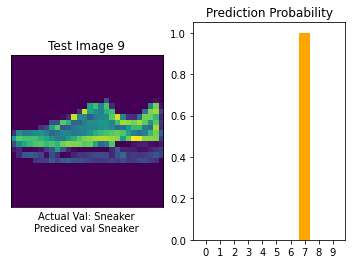

In [63]:
test_img_pred(9)

1/1 [==============================] - 0s 46ms/step


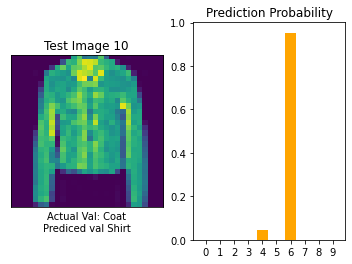

In [64]:
test_img_pred(10)

1/1 [==============================] - 0s 48ms/step


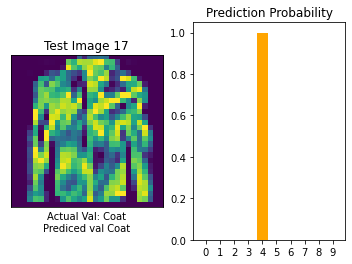

In [65]:
test_img_pred(17)

1/1 [==============================] - 0s 49ms/step


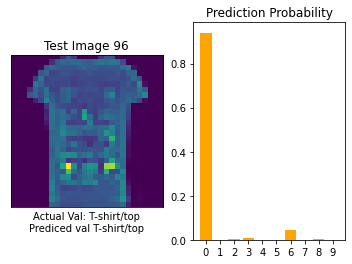

In [66]:
test_img_pred(96)

In [67]:
m1.save('Fashion_mnist.h1')

INFO:tensorflow:Assets written to: Fashion_mnist.h1\assets


INFO:tensorflow:Assets written to: Fashion_mnist.h1\assets


#### Approach - 2
categorical_crossentropy

In [68]:
from tensorflow.keras.utils import to_categorical

In [69]:
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
print(y_train2.shape)
print(y_test2.shape)

(60000, 10)
(10000, 10)


In [70]:
y_train2[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [82]:
x_train2 = x_train[:10000,:,:]
y_train2 = y_train2[:10000]
x_test2 = x_test[:3000,:,:]
y_test2 = y_test2[:3000]
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(10000, 28, 28)
(3000, 28, 28)
(10000, 10)
(3000, 10)


In [83]:
x_train2  = x_train2.reshape(10000,28,28,1)
x_test2  = x_test2.reshape(3000,28,28,1)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(10000, 28, 28, 1)
(3000, 28, 28, 1)
(10000, 10)
(3000, 10)


In [80]:
m2 = Sequential()
m2.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
m2.add(MaxPooling2D(pool_size=(2,2)))  

m2.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)))
m2.add(MaxPooling2D(pool_size=(2,2)))  

m2.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)))
m2.add(MaxPooling2D(pool_size=(2,2)))  

m2.add(Flatten())
m2.add(Dense(64,activation='relu'))
m2.add(Dense(10,activation='softmax'))


m2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

m2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [87]:
h2 = m2.fit(x_train1,y_train1,epochs=25,validation_data=(x_test2,y_test2))

Epoch 1/25


ValueError: in user code:

    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [38]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
20,0.127334,0.9527,0.812440,0.840000,20
21,0.107437,0.9644,0.968146,0.812333,21
22,0.111285,0.9587,0.842892,0.839000,22
23,0.106426,0.9606,0.884995,0.834000,23
24,0.091145,0.9664,0.872463,0.840000,24


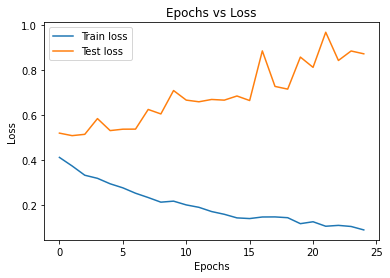

In [39]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

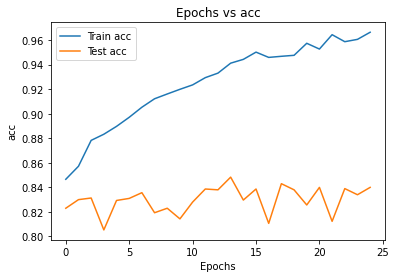

In [41]:
plt.plot(r1['Epochs'],r1['acc'],label='Train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test acc')
plt.title('Epochs vs acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [42]:
ypred = m1.predict(x_test)
ypred[:5]

313/313 [==============================] - 3s 8ms/step


array([[2.2564766e-11, 2.6051093e-13, 6.4312888e-16, 2.5235422e-10,
        1.0191559e-14, 8.4851626e-11, 7.2221612e-10, 6.6599128e-08,
        1.4348477e-12, 9.9999988e-01],
       [1.1013095e-11, 3.0309658e-17, 9.9999940e-01, 2.9931375e-08,
        6.4538023e-07, 1.8369164e-16, 1.7081362e-09, 3.5873915e-11,
        2.3786443e-15, 1.6977263e-20],
       [1.6766221e-22, 1.0000000e+00, 4.4624959e-23, 2.2527618e-22,
        5.5664451e-34, 1.1345513e-35, 1.2497078e-19, 8.9606324e-37,
        1.7697129e-20, 4.4110581e-32],
       [1.0551393e-15, 1.0000000e+00, 6.2249345e-24, 7.9798411e-17,
        4.5052845e-26, 2.4323157e-22, 6.4667488e-13, 1.5322154e-25,
        8.5686759e-15, 1.0082746e-21],
       [7.7446159e-05, 2.2663917e-06, 4.6841949e-05, 1.0733222e-05,
        4.6904898e-01, 1.9183487e-08, 5.3081369e-01, 3.8871981e-09,
        2.6117881e-09, 3.9589474e-09]], dtype=float32)

In [43]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1[:5])

[9, 2, 1, 1, 6]


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[708   5  26  39  16   2 199   0   5   0]
 [  3 960   1  19   6   0   8   0   3   0]
 [ 16   2 685  15 145   0 136   0   1   0]
 [ 20  12  18 854  38   2  52   1   2   1]
 [  2   0  53  38 789   0 114   0   4   0]
 [  0   3   0   4   1 907   0  65   1  19]
 [ 90   6  59  29 154   0 649   0  11   2]
 [  0   0   0   0   0  17   0 949   0  34]
 [  5   4   6   3   9   4  29   3 935   2]
 [  0   0   0   1   0   8   0  49   1 941]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1000
           1       0.97      0.96      0.96      1000
           2       0.81      0.69      0.74      1000
           3       0.85      0.85      0.85      1000
           4       0.68      0.79      0.73      1000
           5       0.96      0.91      0.94      1000
           6       0.55      0.65      0.59      1000
           7       0.89      0.95      0.92      1000
           8       0.97      0.94      0.95      1000
           9       0.94     